# Churn Prediction in Banking

##### Dataset from Kaggle: https://www.kaggle.com/shubh0799/churn-modelling

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#reading in dataset
df = pd.read_csv(r'C:\Users\Stijn\Documents\GitHub\Churn-Prediction\Data\Churn_Modelling.csv', index_col=1)
df.columns = df.columns.str.lower()
df = df.drop('rownumber', axis=1)
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 1. Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          10000 non-null  object 
 1   creditscore      10000 non-null  int64  
 2   geography        10000 non-null  object 
 3   gender           10000 non-null  object 
 4   age              10000 non-null  int64  
 5   tenure           10000 non-null  int64  
 6   balance          10000 non-null  float64
 7   numofproducts    10000 non-null  int64  
 8   hascrcard        10000 non-null  int64  
 9   isactivemember   10000 non-null  int64  
 10  estimatedsalary  10000 non-null  float64
 11  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [4]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#check if there are any missings
df.isna().sum()

surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [6]:
#closer look at the target variable
df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

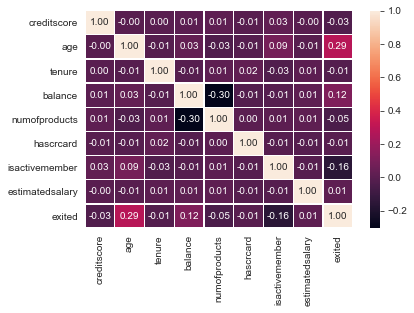

In [7]:
#checking the correlations of the predictor variables
correlation_mat = df.corr()
sns.heatmap(correlation_mat, linewidths = 0.3, annot = True, fmt = ".2f")
plt.show()

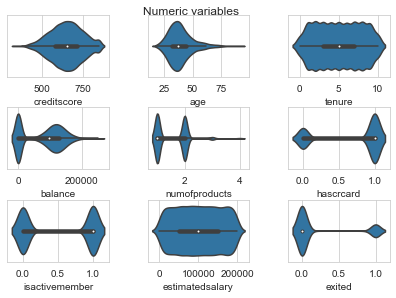

In [8]:
#numeric predictor variables using violin plots
numerics = ['creditscore','age','tenure','balance','numofproducts','hascrcard','isactivemember','estimatedsalary','exited']
i=0
j=0

fig, ax = plt.subplots(3, 3)
fig.tight_layout()
fig.suptitle('Numeric variables')

for column in numerics:
    sns.violinplot(x=column, data=df, ax=ax[i][j])
    if j==2:
        i+=1
        j=0
    else: j+=1
        
plt.show()

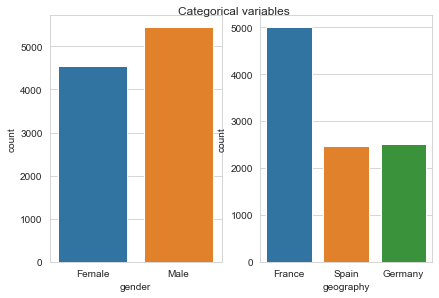

In [46]:
#categorical predictor variabeles using barplots
#geography and gender
fig, ax = plt.subplots(1,2)
fig.tight_layout()
fig.suptitle('Categorical variables')

sns.countplot(x='gender', data=df, ax=ax[0])
sns.countplot(x='geography', data=df, ax=ax[1])

plt.show()

### 2. Cleaning the data

In [10]:
#almost no cleaning needed, just removing obsolete columns
df_clean = df.drop('surname', axis=1)

### 3. Feature Engineering

In [11]:
#one-hot encoding
df_clean_cat = pd.get_dummies(df_clean)
df_clean_cat = df_clean_cat.drop(['geography_France', 'gender_Female'], axis=1)

### 4. Predictive model

In [12]:
#importing packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [13]:
#splitting train and test data
X = df_clean_cat.drop('exited', axis=1)
y = df_clean_cat['exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [56]:
#define a function that calculates the relevant metrics
def calc_metrics(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    
    #create the confusion matrix
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.show()

#### 4.1 LogReg

In [65]:
#importing packages
from sklearn.linear_model import LogisticRegression

In [66]:
#create instance
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_predprob_logreg = logreg.predict_proba(X_test)[:,1]
logreg.score(X_test, y_test)

0.7886666666666666

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2390
           1       0.38      0.06      0.11       610

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.49      3000
weighted avg       0.72      0.79      0.72      3000



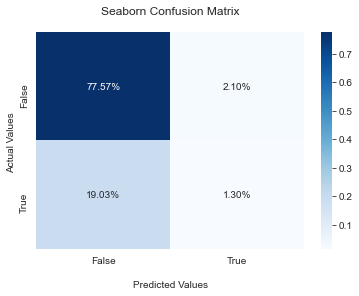

In [67]:
calc_metrics(y_test, y_pred_logreg)

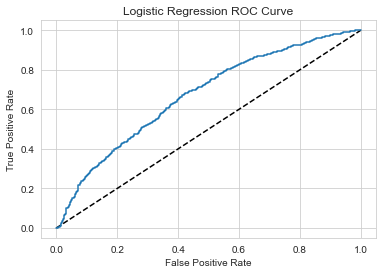

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_predprob_logreg)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

#### 4.2 kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.20333333333333334 at K = 18


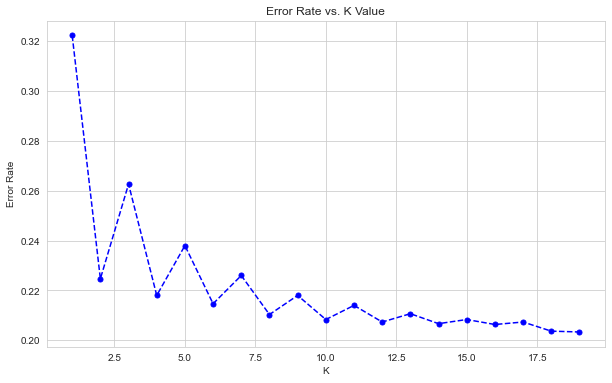

In [20]:
#finding the optimal k
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='.', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7966666666666666 at K = 18


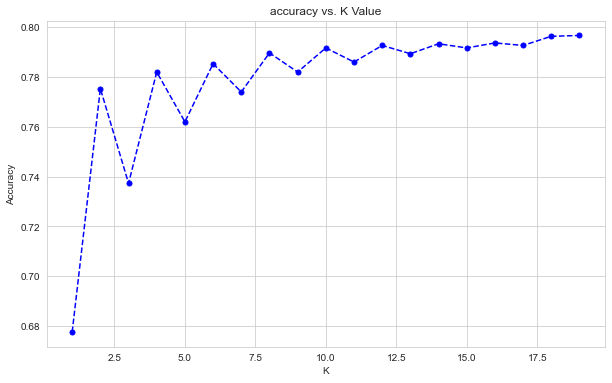

In [21]:
acc = []
from sklearn import metrics
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='.', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [19]:
#create instance
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_predprob_knn = knn.predict_proba(X_test)[:,1]
knn.score(X_test, y_test)

0.7963333333333333

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2390
           1       0.45      0.01      0.02       610

    accuracy                           0.80      3000
   macro avg       0.63      0.50      0.45      3000
weighted avg       0.73      0.80      0.71      3000



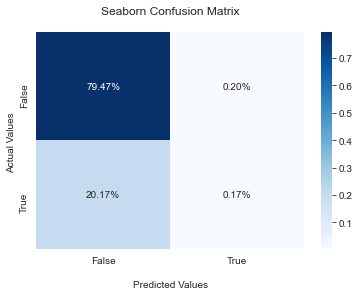

In [68]:
calc_metrics(y_test, y_pred_knn)

#### 4.3 Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [69]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
y_predprob_clf = clf.predict_proba(X_test)[:,1]
clf.score(X_test, y_test)

0.812

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2390
           1       0.96      0.08      0.15       610

    accuracy                           0.81      3000
   macro avg       0.88      0.54      0.52      3000
weighted avg       0.84      0.81      0.74      3000



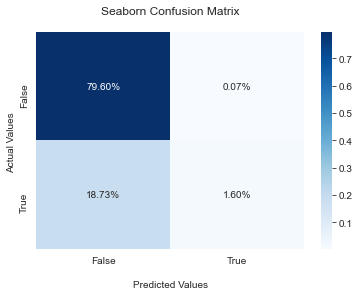

In [70]:
calc_metrics(y_test, y_pred_clf)

In [22]:
#cross validation

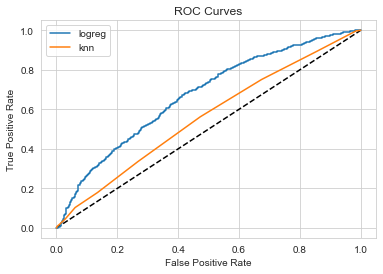

In [23]:
#comparing the ROC curves
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_predprob_logreg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_predprob_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg, tpr_logreg, label='logreg')
plt.plot(fpr_knn, tpr_knn, label='knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()